Compute the performance of MAB methods

In [33]:
import numpy as np
import time
import sys
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline
#plt.rcParams['figure.figsize'] = (15, 6)

## Load BOKEH libariry

In [34]:
from bokeh.layouts import row, gridplot
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import Legend
TOOLS = 'box_zoom,box_select,crosshair,resize,reset,lasso_select,pan,save,poly_select,tap,wheel_zoom,undo'
output_notebook()

Loading BokehJS ...

# Compare the accuracy of the models

## Load the pruned algorithm from normal prune

In [35]:
ucb1 = np.load('/Users/salemameen/Desktop/banditsbook/python_pima/UCB1/AccuracyAftrerPrune.npy')
EpsilonGreedy = np.load('/Users/salemameen/Desktop/banditsbook/python_pima/EpsilonGreedy/AccuracyAftrerPrune.npy')
AnnealingEpsilonGreedy = np.load('/Users/salemameen/Desktop/banditsbook/python_pima/AnnealingEpsilonGreedy/AccuracyAftrerPrune.npy')
Softmax = np.load('/Users/salemameen/Desktop/banditsbook/python_pima/Softmax/AccuracyAftrerPrune.npy')
AnnealingSoftmax = np.load('/Users/salemameen/Desktop/banditsbook/python_pima/AnnealingSoftmax/AccuracyAftrerPrune.npy')
Exp3 = np.load('/Users/salemameen/Desktop/banditsbook/python_pima/Exp3/AccuracyAftrerPrune.npy')
Hedge = np.load('/Users/salemameen/Desktop/banditsbook/python_pima/Hedge/AccuracyAftrerPrune.npy')
ThompsonSampling = np.load('/Users/salemameen/Desktop/banditsbook/python_pima/Thompson_Sampling/AccuracyAftrerPrune.npy')
Accuracy = np.load('/Users/salemameen/Desktop/banditsbook/python_pima/AccuracyBeforePruning.npy')

## Load the pruned algorithm from absulate prune

In [36]:
ucb1_absulate = np.load('/Users/salemameen/Desktop/banditsbook_moving_output/python_pima/UCB1/AccuracyAftrerPrune.npy')
EpsilonGreedy_absulate = np.load('/Users/salemameen/Desktop/banditsbook_moving_output/python_pima/EpsilonGreedy/AccuracyAftrerPrune.npy')
AnnealingEpsilonGreedy_absulate = np.load('/Users/salemameen/Desktop/banditsbook_moving_output/python_pima/AnnealingEpsilonGreedy/AccuracyAftrerPrune.npy')
Softmax_absulate = np.load('/Users/salemameen/Desktop/banditsbook_moving_output/python_pima/Softmax/AccuracyAftrerPrune.npy')
AnnealingSoftmax_absulate = np.load('/Users/salemameen/Desktop/banditsbook_moving_output/python_pima/AnnealingSoftmax/AccuracyAftrerPrune.npy')
Exp3_absulate = np.load('/Users/salemameen/Desktop/banditsbook_moving_output/python_pima/Exp3/AccuracyAftrerPrune.npy')
Hedge_absulate = np.load('/Users/salemameen/Desktop/banditsbook_moving_output/python_pima/Hedge/AccuracyAftrerPrune.npy')
ThompsonSampling_absulate = np.load('/Users/salemameen/Desktop/banditsbook_moving_output/python_pima/Thompson_Sampling/AccuracyAftrerPrune.npy')

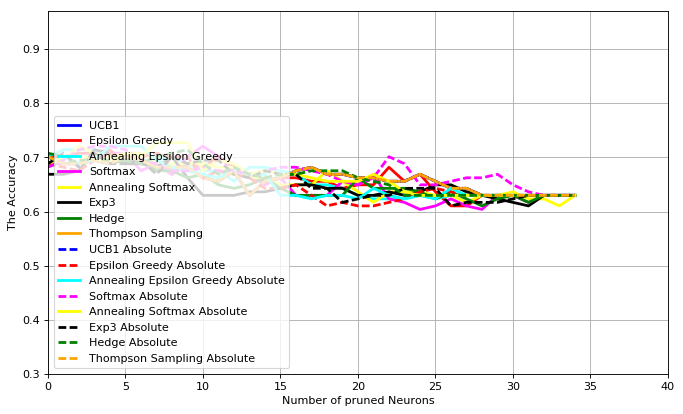

In [37]:
fig = plt.figure(figsize=(10, 6), dpi=80)
ax = fig.add_subplot(111)
N = len(ucb1)
## necessary variables
ind = np.arange(N)                # the x locations for the groups
### Normal algoritms
plt.plot(ind , ucb1 , color="blue", linewidth=2.5, linestyle="-", label="UCB1")
plt.plot(ind , EpsilonGreedy, color="red", linewidth=2.5, linestyle="-", label="Epsilon Greedy")
plt.plot(ind , AnnealingEpsilonGreedy, color="cyan", linewidth=2.5, linestyle="-", label="Annealing Epsilon Greedy")
plt.plot(ind , Softmax, color="magenta", linewidth=2.5, linestyle="-", label="Softmax")
plt.plot(ind , AnnealingSoftmax, color="yellow", linewidth=2.5, linestyle="-", label="Annealing Softmax")
plt.plot(ind , Exp3, color="black", linewidth=2.5, linestyle="-", label="Exp3")
plt.plot(ind , Hedge, color="green", linewidth=2.5, linestyle="-", label="Hedge")
plt.plot(ind , ThompsonSampling, color="orange", linewidth=2.5, linestyle="-", label="Thompson Sampling")
### Absuluate once algoritms
plt.plot(ind , ucb1_absulate , color="blue", linewidth=2.5, linestyle="--", label="UCB1 Absolute")
plt.plot(ind , EpsilonGreedy_absulate, color="red", linewidth=2.5, linestyle="--", label="Epsilon Greedy Absolute")
plt.plot(ind , AnnealingEpsilonGreedy_absulate, color="cyan", linewidth=2.5, linestyle="-", label="Annealing Epsilon Greedy Absolute")
plt.plot(ind , Softmax_absulate, color="magenta", linewidth=2.5, linestyle="--", label="Softmax Absolute")
plt.plot(ind , AnnealingSoftmax_absulate, color="yellow", linewidth=2.5, linestyle="-", label="Annealing Softmax Absolute")
plt.plot(ind , Exp3_absulate, color="black", linewidth=2.5, linestyle="--", label="Exp3 Absolute")
plt.plot(ind , Hedge_absulate, color="green", linewidth=2.5, linestyle="--", label="Hedge Absolute")
plt.plot(ind , ThompsonSampling_absulate, color="orange", linewidth=2.5, linestyle="--", label="Thompson Sampling Absolute")
###########################
plt.legend(loc = 3)
plt.axis([0, 40, 0.3, 0.97])
plt.xlabel('Number of pruned Neurons')
plt.ylabel('The Accuracy')
plt.grid(True)
plt.show()

In [38]:
p1 = figure(title="The Performance over the number of neurons' pruned", tools=TOOLS)
# Normal pruned
#p1.circle(ind, ucb1, legend="ucb1", color="orange")
p1.line(ind, ucb1, legend="ucb1", line_color="orange", line_width=2)
#p1.square(ind, EpsilonGreedy, legend="Epsilon Greedy", fill_color=None, line_color="red")
p1.line(ind, EpsilonGreedy, legend="Epsilon Greedy", line_color="red", line_width=2)
#p1.ellipse(ind, AnnealingEpsilonGreedy, legend="Annealing Epsilon Greedy", line_color="blue", height=0.01, width=0.01)
p1.line(ind, AnnealingEpsilonGreedy, legend="Annealing Epsilon Greedy", line_color="blue", line_width=2)
#p1.diamond(ind, Softmax, legend="Softmax", line_color="green")
p1.line(ind, Softmax, legend="Softmax", line_color="green", line_width=2)
#p1.arc(ind, AnnealingSoftmax, legend="Annealing Softmax", line_color="grey", end_angle= 5, radius= 0.5, start_angle= 1)
p1.line(ind, AnnealingSoftmax, legend="Annealing Softmax", line_color="grey", line_width=2)
#p1.oval(ind, Exp3, legend="Exp3", line_color="black", height=0.01, width=0.01)
p1.line(ind, Exp3, legend="Exp3", line_color="black", line_width=2)
#p1.arc(ind, Hedge, legend="Hedge", line_color="yellow")
#p1.triangle(ind, Hedge, legend="Hedge", line_color="yellow")
p1.line(ind, Hedge, legend="Hedge", line_color="yellow", line_width=2)
#p1.square_cross(ind, ThompsonSampling, legend="Thompson Sampling", line_color="pink")
p1.line(ind, ThompsonSampling, legend="Thompson Sampling", line_color="pink", line_width=2)
#p1.line(ind, Exp3, legend="2*sin(x)", line_dash=(4, 4), line_color="orange", line_width=2)
#p1.square(ind, Hedge, legend="3*sin(x)", fill_color=None, line_color="brown")
##### ============================================================================================
# Absulate pruned
p1.circle(ind, ucb1_absulate, legend="ucb1 Absolute", line_color="orange", line_width=2)
p1.line(ind, ucb1_absulate, legend="ucb1 Absolute", line_color="orange", line_width=2)
#p1.square(ind, EpsilonGreedy, legend="Epsilon Greedy", fill_color=None, line_color="red")
p1.circle(ind, EpsilonGreedy_absulate, legend="Epsilon Greedy Absolute", line_color="red", line_width=2)
p1.line(ind, EpsilonGreedy_absulate, legend="Epsilon Greedy Absolute", line_color="red", line_width=2)
#p1.ellipse(ind, AnnealingEpsilonGreedy, legend="Annealing Epsilon Greedy", line_color="blue", height=0.01, width=0.01)
p1.circle(ind, AnnealingEpsilonGreedy_absulate, legend="Annealing Epsilon Greedy Absolute", line_color="blue", line_width=2)
p1.line(ind, AnnealingEpsilonGreedy_absulate, legend="Annealing Epsilon Greedy Absolute", line_color="blue", line_width=2)
#p1.diamond(ind, Softmax, legend="Softmax", line_color="green")
p1.circle(ind, Softmax_absulate, legend="Softmax Absolute", line_color="green", line_width=2)
p1.line(ind, Softmax_absulate, legend="Softmax Absolute", line_color="green", line_width=2)
#p1.arc(ind, AnnealingSoftmax, legend="Annealing Softmax", line_color="grey", end_angle= 5, radius= 0.5, start_angle= 1)
p1.circle(ind, AnnealingSoftmax_absulate, legend="Annealing Softmax Absolute", line_color="grey", line_width=2)
p1.line(ind, AnnealingSoftmax_absulate, legend="Annealing Softmax Absolute", line_color="grey", line_width=2)
#p1.oval(ind, Exp3, legend="Exp3", line_color="black", height=0.01, width=0.01)
p1.circle(ind, Exp3_absulate, legend="Exp3 Absolute", line_color="black", line_width=2)
p1.line(ind, Exp3_absulate, legend="Exp3 Absolute", line_color="black", line_width=2)
#p1.arc(ind, Hedge, legend="Hedge", line_color="yellow")
#p1.triangle(ind, Hedge, legend="Hedge", line_color="yellow")
p1.circle(ind, Hedge_absulate, legend="Hedge Absolute", line_color="yellow", line_width=2)
p1.line(ind, Hedge_absulate, legend="Hedge Absolute", line_color="yellow", line_width=2)
#p1.square_cross(ind, ThompsonSampling, legend="Thompson Sampling", line_color="pink")
p1.circle(ind, ThompsonSampling_absulate, legend="Thompson Sampling Absolute", line_color="pink", line_width=2)
p1.line(ind, ThompsonSampling_absulate, legend="Thompson Sampling Absolute", line_color="pink", line_width=2)
#p1.line(ind, Exp3, legend="2*sin(x)", line_dash=(4, 4), line_color="orange", line_width=2)
#p1.square(ind, Hedge, legend="3*sin(x)", fill_color=None, line_color="brown")
p1.title.align = "center"
show(p1)
#show(gridplot(p1, p2, ncols=2, plot_width=400, plot_height=400))  # open a browser

## Comparing All algorithms with the model before pruning

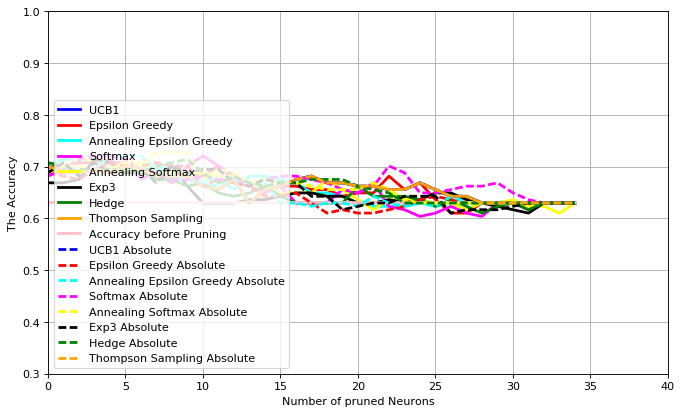

In [39]:
fig = plt.figure(figsize=(10, 6), dpi=80)
ax = fig.add_subplot(111)
N = len(ucb1)
Acc = [Accuracy for col in range(N)]
## necessary variables
ind = np.arange(N)                # the x locations for the groups
plt.plot(ind , ucb1 , color="blue", linewidth=2.5, linestyle="-", label="UCB1")
plt.plot(ind , EpsilonGreedy, color="red", linewidth=2.5, linestyle="-", label="Epsilon Greedy")
plt.plot(ind , AnnealingEpsilonGreedy, color="cyan", linewidth=2.5, linestyle="-", label="Annealing Epsilon Greedy")
plt.plot(ind , Softmax, color="magenta", linewidth=2.5, linestyle="-", label="Softmax")
plt.plot(ind , AnnealingSoftmax, color="yellow", linewidth=2.5, linestyle="-", label="Annealing Softmax")
plt.plot(ind , Exp3, color="black", linewidth=2.5, linestyle="-", label="Exp3")
plt.plot(ind , Hedge, color="green", linewidth=2.5, linestyle="-", label="Hedge")
plt.plot(ind , ThompsonSampling, color="orange", linewidth=2.5, linestyle="-", label="Thompson Sampling")
plt.plot(ind , Acc, color="pink", linewidth=2.5, linestyle="-", label="Accuracy before Pruning")
### Absuluate once algoritms
plt.plot(ind , ucb1_absulate , color="blue", linewidth=2.5, linestyle="--", label="UCB1 Absolute")
plt.plot(ind , EpsilonGreedy_absulate, color="red", linewidth=2.5, linestyle="--", label="Epsilon Greedy Absolute")
plt.plot(ind , AnnealingEpsilonGreedy_absulate, color="cyan", linewidth=2.5, linestyle="--", label="Annealing Epsilon Greedy Absolute")
plt.plot(ind , Softmax_absulate, color="magenta", linewidth=2.5, linestyle="--", label="Softmax Absolute")
plt.plot(ind , AnnealingSoftmax_absulate, color="yellow", linewidth=2.5, linestyle="--", label="Annealing Softmax Absolute")
plt.plot(ind , Exp3_absulate, color="black", linewidth=2.5, linestyle="--", label="Exp3 Absolute")
plt.plot(ind , Hedge_absulate, color="green", linewidth=2.5, linestyle="--", label="Hedge Absolute")
plt.plot(ind , ThompsonSampling_absulate, color="orange", linewidth=2.5, linestyle="--", label="Thompson Sampling Absolute")
plt.legend(loc = 3)
plt.axis([0, 40, 0.3, 1])
plt.xlabel('Number of pruned Neurons')
plt.ylabel('The Accuracy')
plt.grid(True)
plt.show()

In [40]:
p1 = figure(title="The Performance over the number of neurons' pruned", tools=TOOLS)
# Normal pruned
#p1.circle(ind, ucb1, legend="ucb1", color="orange")
p1.line(ind, ucb1, legend="ucb1", line_color="orange", line_width=2)
#p1.square(ind, EpsilonGreedy, legend="Epsilon Greedy", fill_color=None, line_color="red")
p1.line(ind, EpsilonGreedy, legend="Epsilon Greedy", line_color="red", line_width=2)
#p1.ellipse(ind, AnnealingEpsilonGreedy, legend="Annealing Epsilon Greedy", line_color="blue", height=0.01, width=0.01)
p1.line(ind, AnnealingEpsilonGreedy, legend="Annealing Epsilon Greedy", line_color="blue", line_width=2)
#p1.diamond(ind, Softmax, legend="Softmax", line_color="green")
p1.line(ind, Softmax, legend="Softmax", line_color="green", line_width=2)
#p1.arc(ind, AnnealingSoftmax, legend="Annealing Softmax", line_color="grey", end_angle= 5, radius= 0.5, start_angle= 1)
p1.line(ind, AnnealingSoftmax, legend="Annealing Softmax", line_color="grey", line_width=2)
#p1.oval(ind, Exp3, legend="Exp3", line_color="black", height=0.01, width=0.01)
p1.line(ind, Exp3, legend="Exp3", line_color="black", line_width=2)
#p1.arc(ind, Hedge, legend="Hedge", line_color="yellow")
#p1.triangle(ind, Hedge, legend="Hedge", line_color="yellow")
p1.line(ind, Hedge, legend="Hedge", line_color="yellow", line_width=2)
#p1.square_cross(ind, ThompsonSampling, legend="Thompson Sampling", line_color="pink")
p1.line(ind, ThompsonSampling, legend="Thompson Sampling", line_color="pink", line_width=2)
#p1.line(ind, Exp3, legend="2*sin(x)", line_dash=(4, 4), line_color="orange", line_width=2)
#p1.square(ind, Hedge, legend="3*sin(x)", fill_color=None, line_color="brown")
##### ============================================================================================
# Absulate pruned
# Absulate pruned
p1.circle(ind, ucb1_absulate, legend="ucb1 Absolute", line_color="orange", line_width=2)
p1.line(ind, ucb1_absulate, legend="ucb1 Absolute", line_color="orange", line_width=2)
#p1.square(ind, EpsilonGreedy, legend="Epsilon Greedy", fill_color=None, line_color="red")
p1.circle(ind, EpsilonGreedy_absulate, legend="Epsilon Greedy Absolute", line_color="red", line_width=2)
p1.line(ind, EpsilonGreedy_absulate, legend="Epsilon Greedy Absolute", line_color="red", line_width=2)
#p1.ellipse(ind, AnnealingEpsilonGreedy, legend="Annealing Epsilon Greedy", line_color="blue", height=0.01, width=0.01)
p1.circle(ind, AnnealingEpsilonGreedy_absulate, legend="Annealing Epsilon Greedy Absolute", line_color="blue", line_width=2)
p1.line(ind, AnnealingEpsilonGreedy_absulate, legend="Annealing Epsilon Greedy Absolute", line_color="blue", line_width=2)
#p1.diamond(ind, Softmax, legend="Softmax", line_color="green")
p1.circle(ind, Softmax_absulate, legend="Softmax Absolute", line_color="green", line_width=2)
p1.line(ind, Softmax_absulate, legend="Softmax Absolute", line_color="green", line_width=2)
#p1.arc(ind, AnnealingSoftmax, legend="Annealing Softmax", line_color="grey", end_angle= 5, radius= 0.5, start_angle= 1)
p1.circle(ind, AnnealingSoftmax_absulate, legend="Annealing Softmax Absolute", line_color="grey", line_width=2)
p1.line(ind, AnnealingSoftmax_absulate, legend="Annealing Softmax Absolute", line_color="grey", line_width=2)
#p1.oval(ind, Exp3, legend="Exp3", line_color="black", height=0.01, width=0.01)
p1.circle(ind, Exp3_absulate, legend="Exp3 Absolute", line_color="black", line_width=2)
p1.line(ind, Exp3_absulate, legend="Exp3 Absolute", line_color="black", line_width=2)
#p1.arc(ind, Hedge, legend="Hedge", line_color="yellow")
#p1.triangle(ind, Hedge, legend="Hedge", line_color="yellow")
p1.circle(ind, Hedge_absulate, legend="Hedge Absolute", line_color="yellow", line_width=2)
p1.line(ind, Hedge_absulate, legend="Hedge Absolute", line_color="yellow", line_width=2)
#p1.square_cross(ind, ThompsonSampling, legend="Thompson Sampling", line_color="pink")
p1.circle(ind, ThompsonSampling_absulate, legend="Thompson Sampling Absolute", line_color="pink", line_width=2)
p1.line(ind, ThompsonSampling_absulate, legend="Thompson Sampling Absolute", line_color="pink", line_width=2)
p1.line(ind, Acc, legend="Accuracy", line_dash=(4, 4), line_color="orange", line_width=2)
#p1.square(ind, Hedge, legend="3*sin(x)", fill_color=None, line_color="brown")
p1.title.align = "center"
show(p1)
#show(gridplot(p1, p2, ncols=2, plot_width=400, plot_height=400))  # open a browser

## UCB1

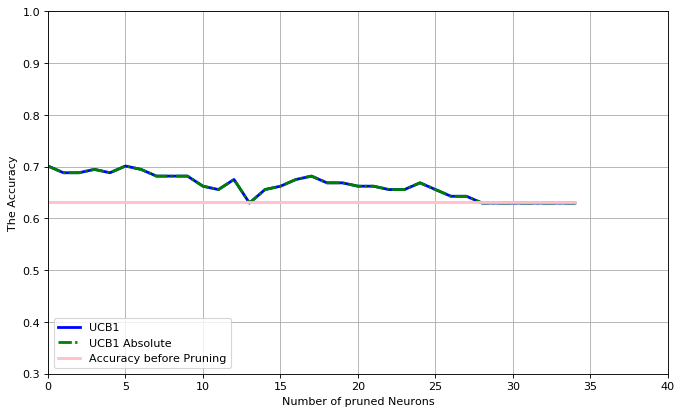

In [41]:
fig = plt.figure(figsize=(10, 6), dpi=80)
ax = fig.add_subplot(111)
N = len(ucb1)
Acc = [Accuracy for col in range(N)]
## necessary variables
ind = np.arange(N)                # the x locations for the groups
plt.plot(ind , ucb1 , color="blue", linewidth=2.5, linestyle="-", label="UCB1")
plt.plot(ind , ucb1_absulate , color="green", linewidth=2.5, linestyle="-.", label="UCB1 Absolute")
plt.plot(ind , Acc, color="pink", linewidth=2.5, linestyle="-", label="Accuracy before Pruning")
plt.legend(loc = 3)
plt.axis([0, 40, 0.3, 1])
plt.xlabel('Number of pruned Neurons')
plt.ylabel('The Accuracy')
plt.grid(True)
plt.show()

In [42]:
p1 = figure(title="The Performance over the number of neurons' pruned", tools=TOOLS)
#p1.circle(ind, ucb1, legend="ucb1", color="orange")
p1.line(ind, ucb1, legend="ucb1", line_color="blue", line_width=2)
p1.circle(ind, ucb1_absulate, legend="ucb1 Absolute", line_color="green", line_width=2)
p1.line(ind, ucb1_absulate, legend="ucb1 Absolute", line_color="green", line_width=2)
p1.line(ind, Acc, legend="Accuracy", line_dash=(4, 4), line_color="orange", line_width=2)
#p1.square(ind, Hedge, legend="3*sin(x)", fill_color=None, line_color="brown")
p1.title.align = "center"
show(p1)
#show(gridplot(p1, p2, ncols=2, plot_width=400, plot_height=400))  # open a browser

## Epsilon greedy and Softmax

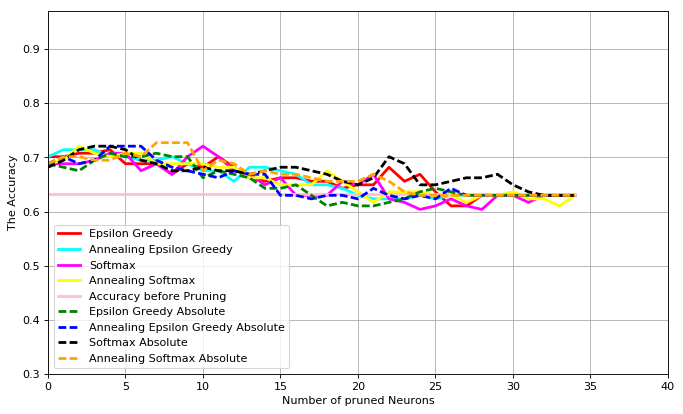

In [43]:
fig = plt.figure(figsize=(10, 6), dpi=80)
ax = fig.add_subplot(111)
N = len(EpsilonGreedy)
Acc = [Accuracy for col in range(N)]
## necessary variables
ind = np.arange(N)                # the x locations for the groups
plt.plot(ind , EpsilonGreedy, color="red", linewidth=2.5, linestyle="-", label="Epsilon Greedy")
plt.plot(ind , AnnealingEpsilonGreedy, color="cyan", linewidth=2.5, linestyle="-", label="Annealing Epsilon Greedy")
plt.plot(ind , Softmax, color="magenta", linewidth=2.5, linestyle="-", label="Softmax")
plt.plot(ind , AnnealingSoftmax, color="yellow", linewidth=2.5, linestyle="-", label="Annealing Softmax")
plt.plot(ind , Acc, color="pink", linewidth=2.5, linestyle="-", label="Accuracy before Pruning")
plt.plot(ind , EpsilonGreedy_absulate, color="green", linewidth=2.5, linestyle="--", label="Epsilon Greedy Absolute")
plt.plot(ind , AnnealingEpsilonGreedy_absulate, color="blue", linewidth=2.5, linestyle="--", label="Annealing Epsilon Greedy Absolute")
plt.plot(ind , Softmax_absulate, color="black", linewidth=2.5, linestyle="--", label="Softmax Absolute")
plt.plot(ind , AnnealingSoftmax_absulate, color="orange", linewidth=2.5, linestyle="--", label="Annealing Softmax Absolute")
plt.legend(loc = 3)
plt.axis([0, 40, 0.3, 0.97])
plt.xlabel('Number of pruned Neurons')
plt.ylabel('The Accuracy')
plt.grid(True)
plt.show()

In [44]:
p1 = figure(title="The Performance over the number of neurons' pruned", tools=TOOLS)
#p1.square(ind, EpsilonGreedy, legend="Epsilon Greedy", fill_color=None, line_color="red")
p1.line(ind, EpsilonGreedy, legend="Epsilon Greedy", line_color="red", line_width=2)
#p1.ellipse(ind, AnnealingEpsilonGreedy, legend="Annealing Epsilon Greedy", line_color="blue", height=0.01, width=0.01)
p1.line(ind, AnnealingEpsilonGreedy, legend="Annealing Epsilon Greedy", line_color="blue", line_width=2)
#p1.diamond(ind, Softmax, legend="Softmax", line_color="green")
p1.line(ind, Softmax, legend="Softmax", line_color="green", line_width=2)
#p1.arc(ind, AnnealingSoftmax, legend="Annealing Softmax", line_color="grey", end_angle= 5, radius= 0.5, start_angle= 1)
p1.line(ind, AnnealingSoftmax, legend="Annealing Softmax", line_color="grey", line_width=2)
p1.circle(ind, EpsilonGreedy_absulate, legend="Epsilon Greedy Absolute", line_color="orange", line_width=2)
p1.line(ind, EpsilonGreedy_absulate, legend="Epsilon Greedy Absolute", line_color="orange", line_width=2)
#p1.ellipse(ind, AnnealingEpsilonGreedy, legend="Annealing Epsilon Greedy", line_color="blue", height=0.01, width=0.01)
p1.circle(ind, AnnealingEpsilonGreedy_absulate, legend="Annealing Epsilon Greedy Absolute", line_color="yellow", line_width=2)
p1.line(ind, AnnealingEpsilonGreedy_absulate, legend="Annealing Epsilon Greedy Absolute", line_color="yellow", line_width=2)
#p1.diamond(ind, Softmax, legend="Softmax", line_color="green")
p1.circle(ind, Softmax_absulate, legend="Softmax Absolute", line_color="cyan", line_width=2)
p1.line(ind, Softmax_absulate, legend="Softmax Absolute", line_color="cyan", line_width=2)
#p1.arc(ind, AnnealingSoftmax, legend="Annealing Softmax", line_color="grey", end_angle= 5, radius= 0.5, start_angle= 1)
p1.circle(ind, AnnealingSoftmax_absulate, legend="Annealing Softmax Absolute", line_color="magenta", line_width=2)
p1.line(ind, AnnealingSoftmax_absulate, legend="Annealing Softmax Absolute", line_color="magenta", line_width=2)
p1.line(ind, Acc, legend="Accuracy", line_dash=(4, 4), line_color="black", line_width=2)
#p1.square(ind, Hedge, legend="3*sin(x)", fill_color=None, line_color="brown")
p1.title.align = "center"
show(p1)
#show(gridplot(p1, p2, ncols=2, plot_width=400, plot_height=400))  # open a browser

## Adversial Bandits Hedge and EXP3

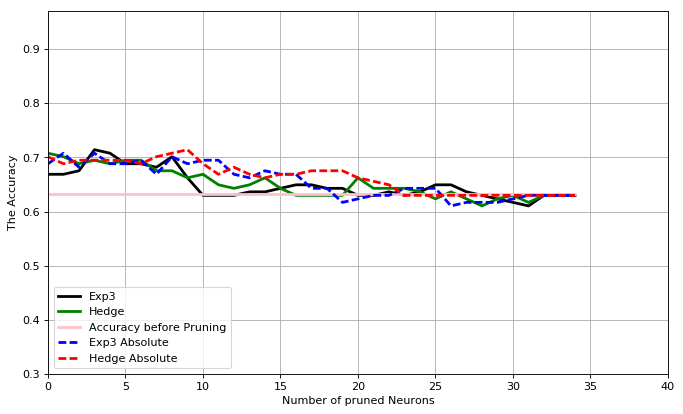

In [45]:
fig = plt.figure(figsize=(10, 6), dpi=80)
ax = fig.add_subplot(111)
N = len(Exp3)
Acc = [Accuracy for col in range(N)]
## necessary variables
ind = np.arange(N)                # the x locations for the groups
plt.plot(ind , Exp3, color="black", linewidth=2.5, linestyle="-", label="Exp3")
plt.plot(ind , Hedge, color="green", linewidth=2.5, linestyle="-", label="Hedge")
plt.plot(ind , Acc, color="pink", linewidth=2.5, linestyle="-", label="Accuracy before Pruning")
plt.plot(ind , Exp3_absulate, color="blue", linewidth=2.5, linestyle="--", label="Exp3 Absolute")
plt.plot(ind , Hedge_absulate, color="red", linewidth=2.5, linestyle="--", label="Hedge Absolute")
plt.legend(loc = 3)
plt.axis([0, 40, 0.3, 0.97])
plt.xlabel('Number of pruned Neurons')
plt.ylabel('The Accuracy')
plt.grid(True)
plt.show()

In [46]:
p1 = figure(title="The Performance over the number of neurons' pruned", tools=TOOLS)
#p1.oval(ind, Exp3, legend="Exp3", line_color="black", height=0.01, width=0.01)
p1.line(ind, Exp3, legend="Exp3", line_color="black", line_width=2)
#p1.arc(ind, Hedge, legend="Hedge", line_color="yellow")
#p1.triangle(ind, Hedge, legend="Hedge", line_color="yellow")
p1.line(ind, Hedge, legend="Hedge", line_color="yellow", line_width=2)
p1.circle(ind, Exp3_absulate, legend="Exp3 Absolute", line_color="green", line_width=2)
p1.line(ind, Exp3_absulate, legend="Exp3 Absolute", line_color="green", line_width=2)
#p1.arc(ind, Hedge, legend="Hedge", line_color="yellow")
#p1.triangle(ind, Hedge, legend="Hedge", line_color="yellow")
p1.circle(ind, Hedge_absulate, legend="Hedge Absolute", line_color="red", line_width=2)
p1.line(ind, Hedge_absulate, legend="Hedge Absolute", line_color="red", line_width=2)
p1.line(ind, Acc, legend="Accuracy", line_dash=(4, 4), line_color="orange", line_width=2)
#p1.square(ind, Hedge, legend="3*sin(x)", fill_color=None, line_color="brown")
p1.title.align = "center"
show(p1)
#show(gridplot(p1, p2, ncols=2, plot_width=400, plot_height=400))  # open a browser

# Thompson Sampling

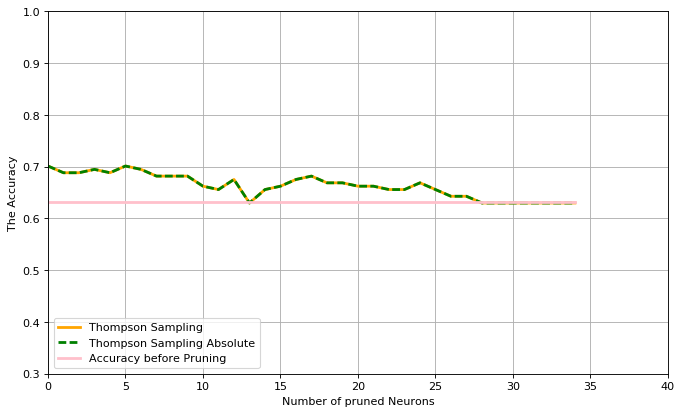

In [47]:
fig = plt.figure(figsize=(10, 6), dpi=80)
ax = fig.add_subplot(111)
N = len(ThompsonSampling)
Acc = [Accuracy for col in range(N)]
## necessary variables
ind = np.arange(N)                # the x locations for the groups
plt.plot(ind , ThompsonSampling, color="orange", linewidth=2.5, linestyle="-", label="Thompson Sampling")
plt.plot(ind , ThompsonSampling_absulate, color="green", linewidth=2.5, linestyle="--", label="Thompson Sampling Absolute")
plt.plot(ind , Acc, color="pink", linewidth=2.5, linestyle="-", label="Accuracy before Pruning")
plt.legend(loc = 3)
plt.axis([0, 40, 0.3, 1])
plt.xlabel('Number of pruned Neurons')
plt.ylabel('The Accuracy')
plt.grid(True)
plt.show()

In [48]:
p1 = figure(title="The Performance over the number of neurons' pruned", tools=TOOLS)
#p1.square_cross(ind, ThompsonSampling, legend="Thompson Sampling", line_color="pink")
p1.line(ind, ThompsonSampling, legend="Thompson Sampling", line_color="pink", line_width=2)
p1.line(ind, Acc, legend="Accuracy", line_dash=(4, 4), line_color="orange", line_width=2)
p1.circle(ind, ThompsonSampling_absulate, legend="Thompson Sampling Absolute", line_color="green", line_width=2)
p1.line(ind, ThompsonSampling_absulate, legend="Thompson Sampling Absolute", line_color="green", line_width=2)
#p1.square(ind, Hedge, legend="3*sin(x)", fill_color=None, line_color="brown")
p1.title.align = "center"
show(p1)
#show(gridplot(p1, p2, ncols=2, plot_width=400, plot_height=400))  # open a browser